**stdin and stdout**

In [1]:
# egrep.py
import sys, re

# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
regex = sys.argv[1]

# for every line passed into the script
for line in sys.stdin:
    # if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

checked on command line with:

`cat egrep.py | python3 egrep.py "[0-9]"`

In [2]:
# line_count.py
import sys

count = 0
for line in sys.stdin:
    count += 1

# print goes to sys.stdout
print (count)

0


checked on command line with:

`cat line_count.py | python3 line_count.py`

checked on command line with:
`cat most_common_words.py | python3 most_common_words.py  10`

# Reading Files #

previous cell not checked

previous cell not checked

copies egrep.py to input.txt

checked on command line with:

`python3 starts_with_hash.py`

Created `email_addresses.txt` with contents
<pre>
a@a.com
b@c.com
c@gmail.com
</pre>

checked on command line with:

`python3 get_domains.py`

**Delimited Files**

Copied stock info to `tab_delimited_stock_prices.txt` (note: not .csv) as:
<pre>
6/20/2014       AAPL    90.91
6/20/2014       MSFT    41.68
6/20/2014       FB      64.5
6/19/2014       AAPL    91.86
6/19/2014       MSFT    41.51
6/19/2014       FB      64.34
</pre>

checked on command line with:

`python3 tab_delimited_reader.py`


Copied stock info to `colon_delimited_stock_prices.txt` as:
<pre>
date:symbol:closing_price
6/20/2014:AAPL:90.91
6/20/2014:MSFT:41.68
6/20/2014:FB:64.5
6/19/2014:AAPL:91.86
6/19/2014:MSFT:41.51
6/19/2014:FB:64.34
</pre>

checked on command line with:

`python3 colon_delimited_reader.py`

checked on command line with:

`python3 comma_delimited_writer.py`

did not test the cell above

# Scraping the Web #

In [4]:
from bs4 import BeautifulSoup
import requests
html = requests.get("http://www.example.com").text
# soup = BeautifulSoup(html,"html.parser")  # had to restart kernel to recognize pip installed libraries
# soup = BeautifulSoup(html, 'lxml')
soup = BeautifulSoup(html, "html5lib")

print(soup) # display output

<!DOCTYPE html>
<html><head>
    <title>Example Domain</title>

    <meta charset="utf-8"/>
    <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
    <meta content="width=device-width, initial-scale=1" name="viewport"/>
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 50px;
        background-color: #fff;
        border-radius: 1em;
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        body {
            background-color: #fff;
        }
        div {
            width: auto;
            margin: 0 auto;
            border-radius: 0;
            padding: 1em;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domain i

In [5]:
first_paragraph = soup.find('p')  # or just soup.p
print(first_paragraph)

<p>This domain is established to be used for illustrative examples in documents. You may use this
    domain in examples without prior coordination or asking for permission.</p>


In [6]:
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()

print(first_paragraph_text)
print(first_paragraph_words)

This domain is established to be used for illustrative examples in documents. You may use this
    domain in examples without prior coordination or asking for permission.
['This', 'domain', 'is', 'established', 'to', 'be', 'used', 'for', 'illustrative', 'examples', 'in', 'documents.', 'You', 'may', 'use', 'this', 'domain', 'in', 'examples', 'without', 'prior', 'coordination', 'or', 'asking', 'for', 'permission.']


In [14]:
#first_paragraph_id = soup.p['id']   # raises KeyError if no 'id'
first_paragraph_id2 = soup.p.get('id') # returns None if no 'id

# print(first_paragraph_id)
print(first_paragraph_id2) 

None


In [19]:
all_paragraphs = soup.find_all('p')  # or just soup('p')
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]
                    
print(all_paragraphs)    
print(paragraphs_with_ids)

[<p>This domain is established to be used for illustrative examples in documents. You may use this
    domain in examples without prior coordination or asking for permission.</p>, <p><a href="http://www.iana.org/domains/example">More information...</a></p>]
[]


In [22]:
important_paragraphs = soup('p', {'class': 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p')
                         if 'important' in p.get('class', [])]

print(important_paragraphs)
print(important_paragraphs2)
print(important_paragraphs3)

[]
[]
[]


In [23]:
# warning, will return the same span multiple times
# if it sits inside multiple dics
# be more clever it that's the case
spans_inside_divs = [span
                     for div in soup('div')     # for each <div> on the page
                     for span in div('span')]   # find each <span> inside it

print(spans_inside_divs)

[]


In [26]:
# check robots.txt file for how to behave
html = requests.get("http://shop.oreilly.com/robots.txt").text
soup = BeautifulSoup(html, "html5lib")
print(soup)

# check terms file
html = requests.get("http://oreilly.com/terms/").text
soup = BeautifulSoup(html, "html5lib")
print(soup)

<html><head></head><body>User-agent: * 
Crawl-delay: 30 
Request-rate: 1/30 
Disallow: /util/ 
Disallow: /account 
Disallow: /text/products/
Disallow: /category/deals/

Allow: /sitemap.xml 
Allow: /text/sitemapancillary.xml 
Allow: /text/sitemapcategoryproduct.xml 
Sitemap: http://shop.oreilly.com/sitemap.xml
</body></html>
<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html><head>



<style type="text/css">
li.GlobalNavInfo.right { width: 145px; }
</style>



<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!--chartbeat-->
<script type="text/javascript">var _sf_startpt=(new Date()).getTime()</script>


	<title>Terms of Service | O'Reilly Media, Inc.</title>
	<meta content=",O'Reilly Media" name="keywords"/>
	<meta content=" " name="description"/>
	<meta content="May. 05, 2014" name="date"/>
	<meta content="2014-05-05" name="search_date"/>
	<meta content="Terms of Service | O'Reilly Media, Inc." name="search-

In [28]:
# you don't have to split the url like this unless it needs to fit in a book
url = "http://shop.oreilly.com/category/browse-subjects/" + \
      "data.do?sortby=publicationDate&page=1"
soup = BeautifulSoup(requests.get(url).text, "html5lib")

print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html><head>
        
<!--Janrain SSO JavaScripts -->


<!-- Script added to resolve JS error coming on IE-8 for Janrain login -->
<script>
	document.getElementsByClassName = 
	Element.prototype.getElementsByClassName = function(class_names) {
		// Turn input in a string, prefix space for later space-dot substitution
		class_names = (' ' + class_names)
			// Escape special characters
			.replace(/[~!@$%^&*()_+\-=,./';:"?><[\]{}|`#]/g, '\$&')
			// Normalize whitespace, right-trim
			.replace(/\s*(\s|$)/g, '$1')
			// Replace spaces with dots for querySelectorAll
			.replace(/\s/g, '.');
		return this.querySelectorAll(class_names);
	};
</script>



<meta content="SKYPE_TOOLBAR_PARSER_COMPATIBLE" name="SKYPE_TOOLBAR"/>

<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>

     <meta content="summary" name="twitter:card"/>

    <meta content="Data - Books &amp; Videos - 

In [30]:
tds = soup('td', 'thumbtext')
print(len(tds)) #30

30


In [34]:
def is_video(td):
    """it's a video if it has exactly one pricelabel, and if
    the stripped text inside that pricelabel starts with 'Video'"""
    pricelabels = td('span', 'pricelabel')
    return (len(pricelabels) == 1 and
            pricelabels[0].text.strip().startswith("Video"))

print(len([td for td in tds if not is_video(td)]))
# 21 for me, might be different for you

25


In [56]:
td = soup  # need to assign td to soup

In [51]:
title = td.find("div", "thumbheader").a.text 
print(title)

Fast Data: Smart and at Scale


In [52]:
author_name = td.find("div", "AuthorName").text 
authors = [x.strip() for x in re.sub("^By ", "", author_name).split(",")]
print(authors)

['Ryan Betts', 'John Hugg']


In [62]:
isbn_link = td.find("div", "thumbheader").a.get("href")

#re.match captures the part of the regex in parentheses
isbn = re.match("/product/(.*)\.do", isbn_link).group(1)

print(isbn)

0636920045809


In [63]:
date = td.find("span", "directorydate").text.strip()
print(date)

November 2015


In [81]:
def book_info(td):
    """given a BeautifulSoup <td> Tag representing a book,
    extract the book's details and return a dict"""
    
    title = td.find("div", "thumbheader").a.text 
    by_author = td.find("div", "AuthorName").text 
    authors = [x.strip() for x in re.sub("^By ", "", by_author).split(",")]
    isbn_link = td.find("div", "thumbheader").a.get("href")
    isbn = re.match("/product/(.*)\.do", isbn_link).group()[0]
    date = td.find("span", "directorydate").text.strip()
#     print(title, authors,isbn,date)
    return {
        "title": title,
        "authors" : authors,
        "isbn" : isbn,
        "date" : date
    }

from bs4 import BeautifulSoup
import requests
from time import sleep
base_url = "http://shop.oreilly.com/category/browse-subjects/" + \
           "data.do?sortby=publicationDate&page="

books = []
NUM_PAGES = 31 # at the time of writing, probably more by now

# for page_num in range(1, NUM_PAGES + 1):
for page_num in range(1, 3):  # so it does not take so long

    print("souping page", page_num, ",", len(books), " found so far")
    url = base_url + str(page_num)
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    
    for td in soup('td', 'thumbtext'):
        
        if not is_video(td):
            books.append(book_info(td))
            
    # now be a good citizen and respect the robots.txt!
    sleep(30)


souping page 1 , 0  found so far
souping page 2 , 25  found so far
souping page 3 , 50  found so far
souping page 4 , 69  found so far
souping page 5 , 98  found so far
souping page 6 , 119  found so far
souping page 7 , 146  found so far
souping page 8 , 170  found so far
souping page 9 , 196  found so far
souping page 10 , 219  found so far
souping page 11 , 245  found so far
souping page 12 , 268  found so far
souping page 13 , 292  found so far
souping page 14 , 316  found so far
souping page 15 , 340  found so far
souping page 16 , 366  found so far
souping page 17 , 394  found so far
souping page 18 , 422  found so far
souping page 19 , 448  found so far
souping page 20 , 478  found so far
souping page 21 , 505  found so far
souping page 22 , 531  found so far
souping page 23 , 560  found so far
souping page 24 , 589  found so far
souping page 25 , 616  found so far
souping page 26 , 642  found so far
souping page 27 , 669  found so far
souping page 28 , 694  found so far
souping

In [75]:
print (dir(soup))

['ASCII_SPACES', 'DEFAULT_BUILDER_FEATURES', 'HTML_FORMATTERS', 'NO_PARSER_SPECIFIED_WARNING', 'ROOT_TAG_NAME', 'XML_FORMATTERS', '__bool__', '__call__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_strings', '_attr_value_as_string', '_attribute_checker', '_feed', '_find_all', '_find_one', '_formatter_for_name', '_is_xml', '_lastRecursiveChild', '_last_descendant', '_most_recent_element', '_popToTag', '_select_debug', '_selector_combinators', '_should_pretty_print', '_tag_name_matches_and', 'append', 'attribselect_re', 'attrs', 'builder', 'can_be_empty_element', 'chil

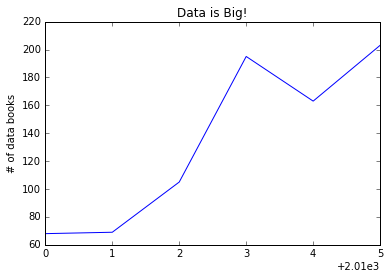

In [100]:
%matplotlib inline

from collections import Counter
import matplotlib.pyplot as plt

def get_year(book):
    """book["date"] looks like 'November 2014' so we need to 
    split on the space and then take the second piece"""
    return int(book["date"].split()[1])

# 2014 is the last complete year of data (when I ran this)
year_counts = Counter(get_year(book) for book in books
                      if get_year(book) <= 2015)  # changed from 2014

years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
# print(list(zip(years,book_counts)))
plt.plot(years, book_counts)
plt.ylabel("# of data books")
plt.title("Data is Big!")

plt.show()

**Using APIs**

In [1]:
import json
serialized = """{"title" : "Data Science Book",
                 "author" : "Joel Grus",
                 "publicationYear" : 2014,
                 "topics" : [ "data", "science", "data science"] }"""

#parse the JSON to create a Python dict
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print(deserialized)

{'publicationYear': 2014, 'topics': ['data', 'science', 'data science'], 'author': 'Joel Grus', 'title': 'Data Science Book'}


**Using an Unauthenticated API**

In [104]:
import requests, json
endpoint = "https://api.github.com/users/joelgrus/repos"

repos = json.loads(requests.get(endpoint).text)
print(repos)

[{'forks': 0, 'owner': {'site_admin': False, 'followers_url': 'https://api.github.com/users/joelgrus/followers', 'html_url': 'https://github.com/joelgrus', 'gravatar_id': '', 'events_url': 'https://api.github.com/users/joelgrus/events{/privacy}', 'organizations_url': 'https://api.github.com/users/joelgrus/orgs', 'gists_url': 'https://api.github.com/users/joelgrus/gists{/gist_id}', 'received_events_url': 'https://api.github.com/users/joelgrus/received_events', 'repos_url': 'https://api.github.com/users/joelgrus/repos', 'login': 'joelgrus', 'type': 'User', 'following_url': 'https://api.github.com/users/joelgrus/following{/other_user}', 'url': 'https://api.github.com/users/joelgrus', 'id': 1308313, 'subscriptions_url': 'https://api.github.com/users/joelgrus/subscriptions', 'starred_url': 'https://api.github.com/users/joelgrus/starred{/owner}{/repo}', 'avatar_url': 'https://avatars.githubusercontent.com/u/1308313?v=3'}, 'homepage': None, 'has_issues': False, 'svn_url': 'https://github.com/

In [106]:
from dateutil.parser import parse

dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

print("month_counts", month_counts)
print("weekday_counts", weekday_counts)

month_counts Counter({7: 8, 6: 4, 8: 4, 11: 4, 2: 2, 5: 2, 9: 2, 4: 1, 10: 1, 12: 1})
weekday_counts Counter({4: 6, 2: 5, 1: 4, 3: 4, 5: 4, 6: 4, 0: 2})


In [109]:
last_5_repositories = sorted(repos,
                             key=lambda r: r["created_at"],
                             reverse=True)[:5]
last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

# print("last_5_repositories", last_5_repositories)
print("last_5_languages", last_5_languages)

last_5_languages ['JavaScript', 'PureScript', 'JavaScript', 'PureScript', 'Elm']


**Finding APIs**

In [5]:
import json  #read Twitter Key from file

key_serialized = ""
with open("twitter_api.key", 'r') as f:
    for line in f:
        key_serialized += line
    
key = json.loads(key_serialized)
print (len(key))

CONSUMER_KEY = key['API Key']
CONSUMER_SECRET = key['Consumer Secret']
ACCESS_TOKEN = key['Access Token']
ACCESS_TOKEN_SECRET = key['Access Token Secret']

print(len(CONSUMER_KEY))
print(len(CONSUMER_SECRET))
print(len(ACCESS_TOKEN))
print(len(ACCESS_TOKEN_SECRET))

4
25
50
50
45


In [32]:
from twython import Twython

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

# search for tweets containing the phrase "data science"

for status in twitter.search(q='"data science"')["statuses"]:
#     user = status["user"]["screen_name"].encode('utf-8')
#     text = status["text"].encode('utf-8')

    # encode not necessary for Python3?
    user = status["user"]["screen_name"]
    text = status["text"]
    print (user, ":", text)

#     print (status)
    print ()


DataSciTechScot : Register here https://t.co/UpOttNNieS for our meetup tomorrow at @DataLabScotland with @SportScotland #DataScience #Analytics #Technology

DataSciTechScot : RT @DataLabScotland: Looking forward to a busy Thursday: @SICSA_Scotland #DEMOFest https://t.co/h1foKAWs6g and @DataSciTechScot #Meetup htt…

ProductChef : RT @Medidata: You can’t just put a new tool on an old process. #Data #science ensures our customers do things efficiently - our own @Produc…

evanpdunn : RT @KirkDBorne: Your trusted advisor &amp; partner in NextGen #Analytics and #DataScience: @BoozAllen https://t.co/lnm8Hbx1iY #BigData https://…

shakamunyi : Big Data Science  @analyticbridge     :The Interview with Yann Lecun of Facebook Artificial Intelligence ht... https://t.co/5RzCcETvhj

Medidata : You can’t just put a new tool on an old process. #Data #science ensures our customers do things efficiently - our own @ProductChef #PCTrials

gupta_r_k : RT @analyticbridge: Python (and R) for Data Science - s

In [59]:
from twython import TwythonStreamer
from collections import Counter

# appending data to a global variable is pretty port form
# but it makes the example much simpler
tweets = []

class MyStreamer(TwythonStreamer):
    """our own subclass of TwythonStreamer that specifies
    how to interact with the stream"""
    
    def on_success(self, data):
        """what do we do when twitter sends us data?
        here data will be a Python dict representing a tweet"""
        
#         print (json.dumps(data, indent=2, sort_keys=True) )

# only want to collect Englush-language tweets
#         if data['lang'] == 'en':

        if "lang" in data.keys() and data['lang'] == 'en':
            tweets.append(data)
            if len(tweets) % 10 == 0:
                print("received tweet #", len(tweets))


        # stop when we've collected enough
        if len(tweets) >= 100:
            self.disconnect()
            
    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()
        
stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET,
                    ACCESS_TOKEN, ACCESS_TOKEN_SECRET)      

# starts consuming public statuses that contain the keywork 'data'
# stream.statuses.filter(track='data')

# if instead we wanted to start consuming a sample of *all* public statuses
stream.statuses.sample()

# received KeyError: 'hashtag'.  Not all tweets have hashtag key
# top_hashtags = Counter(hashtag['text'].lower()
#                        for tweet in tweets
#                        for hashtag in tweet["entities"]["hashtag"])

top_words = Counter(word
                     for tweet in tweets
                     for word in tweet["text"].split())

print(top_words.most_common(10))

received tweet # 10
received tweet # 20
received tweet # 30
received tweet # 40
received tweet # 50
received tweet # 60
received tweet # 70
received tweet # 80
received tweet # 90
received tweet # 100
[('RT', 45), ('the', 32), ('of', 20), ('to', 19), ('and', 15), ('is', 15), ('a', 14), ('in', 13), ('I', 12), ('The', 10)]
